### Algorithmic Thermodynamics

In [1]:
import qiskit
from qiskit import QuantumCircuit, execute, transpile
from qiskit.visualization import array_to_latex
from qiskit import Aer

The Hamiltonian of an 1D Harmonic Oscillator, would be a diagonalized matrix, whose diagonal elements would represent the form 

$${H} = \hbar\ \omega\ (\frac{n}{2} + 1)$$

Hence the diagonal matrix we get, can be represented as follows:

$$H = \frac{\hbar\ \omega}{2}\ \begin{pmatrix} 1 & 0 & 0 & 0 \\ 0 & 3 & 0 & 0 \\  0 & 0 & 5 & 0 \\ 0 & 0 & 0 & 7 \end{pmatrix}$$



In [2]:
H = [[1,0,0,0],
     [0,3,0,0],
     [0,0,5,0],
     [0,0,0,7]]

In [4]:
import numpy as np

In [5]:
q, r = np.linalg.qr(H)

In [6]:
p = np.dot(q.T, H)
np.dot(np.linalg.inv(r), p)

array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.]])

The unitary matrix of H is given by:

$$H' = \frac{\hbar\ \omega}{2} \begin{pmatrix} 1 & 0 & 0 & 0 \\ 0 & 1 & 0 & 0 \\ 0 & 0 & 1 & 0 \\ 0 & 0 & 0 & 1 \\ \end{pmatrix}$$

In [7]:
circ = QuantumCircuit(2)

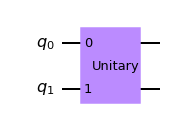

In [8]:
H1 = [[1,0,0,0],
     [0,1,0,0],
     [0,0,1,0],
     [0,0,0,1]]
circ.unitary(H1, [0, 1])
circ.draw('mpl')

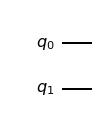

In [9]:
trans_circ = transpile(circ, basis_gates=['I', 'H', 'cx'])
trans_circ.draw('mpl')

### Introducing the Kolmogorov Complexity

In [10]:
import numpy as np
from pybdm import BDM

#Y = np.ones((100,100), dtype = int)

X = np.array([[1,0,0,0], [0, 1, 0, 0], [0,0,1,0], [0,0,0,1]], dtype = int)

bdm = BDM(ndim=2)

bdm.bdm(X)

23.2385807669306

In [11]:
bdm.ent(X)

0.0

As we can see the entropy of the unitary Hamiltonian is 0. We will now calculate the entanglement entropy, also known as the von Neumann entropy and compare the two.

### Calculating the von Neumann Entropy


The von Neumann entropy is given by $S(\rho_i) = -Tr[\rho_i log_2(\rho_i)]$.

Where $\rho_i$ is the density matrix of the 'ith' state.

For this we need to find the eigenvalue and eigenvectors of the unitary Hamiltonian. Then for the 'ith' state the density matrix can be written as follows:

$\rho_i = |\psi_i \rangle \langle \psi_i|$

np.linalg.eig(X)

In [15]:
a = [1, 0, 0, 0]
b = [[1],
     [0],
     [0],
     [0]]

In [16]:
print(b)

[[1], [0], [0], [0]]


In [19]:
rho = np.outer(b, a)
print(rho)

[[1 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]]


In [21]:
from qiskit import quantum_info

In [22]:
quantum_info.entropy(rho, base =2)

0.0

As we can see both the entropies are 0.